# Telco™ Project
- Liam Jackson

Goals:

    Find drivers of customer churn
    Accurately predict customer churn at Telco™

To Do:

    Find 2 or more drivers of churn using statistical tests
    Establish baseline accuracy
    Outperform baseline accuracy using a classification model
    Document insights from each stage of the data science pipeline


Audience:

    Our target audience for your notebook walkthrough is the Codeup Data Science team. This should guide your language and level of explanations in your walkthrough.

Findings:

- In the search for significant factors of chrun within the Telco dataset, I found that fiber optic customers are churing at higher rates than any other internet service within the company. 
    
- Through careful analysis I found that these customers make up roughly 44% of all customers within telco. This needs to be addressed. 

- while looking deeper we found that customers without internet security seem to chrun at higher rates. 

# Imports

In [1]:
import acquire
import prepare
import explore
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from pandas import DataFrame
from acquire import acquire_telco_data
from prepare import train_validate_test_split
from prepare import prep_telco_data
from prepare import data_target_split
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Acquire

- Create a fucntion that will acquire telco.csv
- Take a look at its values (info, describe, and head)
- Plot some histograms showing the distributions of variables of intrest

In [2]:
df = acquire_telco_data

In [3]:
df = acquire_telco_data(df)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Shape (rows x columns)

In [5]:
df.shape

(7043, 21)

#### Values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [9]:
for column in df.columns:
    print("\n" + column)
    print(df[column].value_counts())


customerID
2275-RBYQS    1
5908-QMGOE    1
2882-WDTBA    1
0177-PXBAT    1
1157-BQCUW    1
             ..
9853-JFZDU    1
6635-CPNUN    1
8327-LZKAS    1
5013-SBUIH    1
2233-FAGXV    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Look at  some histograms

Text(0.5, 0, 'Internet Type')

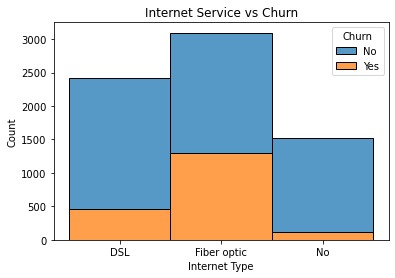

In [11]:
# Internet service and churn
sns.histplot(data=df,
            x=df.InternetService,
            hue=df.Churn,
            multiple='stack')

plt.title("Internet Service vs Churn")
plt.xlabel('Internet Type')


Text(0.5, 0, 'tenure')

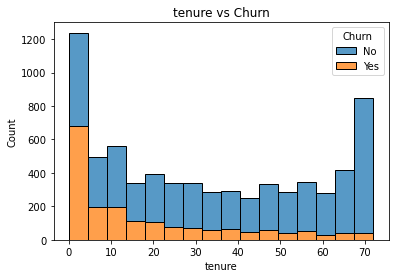

In [12]:
# Look at tenure and churn
sns.histplot(data=df,
            x=df.tenure,
            hue=df.Churn,
            multiple='stack')

plt.title("tenure vs Churn")
plt.xlabel('tenure')

Text(0.5, 0, 'tenure')

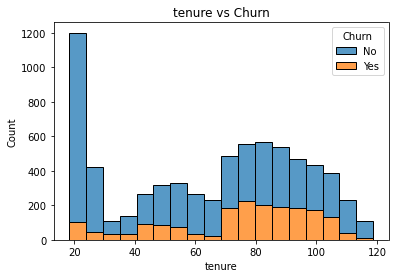

In [13]:
# Look at monthly payments and churn
sns.histplot(data=df,
            x=df.MonthlyCharges,
            hue=df.Churn,
            multiple='stack')

plt.title("tenure vs Churn")
plt.xlabel('tenure')

# Prepare

- Create acquire.py, prepare.py, and explore.py
- Split data (train/validate/test)
- Handle missing values in any
- Encode with get_dummies any values
- Create any new features, if you decided to make any for this project
- Get an (MVP)
    - create new feature for tenure in years
    - create single var. (dependents and partner = family)

In [14]:
# Clean the data

In [15]:
df = prep_telco_data(df)

In [16]:
df.head()

,customer_id,senior_citizen,tenure,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_One year,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
0,7590-VHVEG,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,0,34,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   customer_id                             7043 non-null   object
 1   senior_citizen                          7043 non-null   int64 
 2   tenure                                  7043 non-null   int64 
 3   internet_service_Fiber optic            7043 non-null   uint8 
 4   internet_service_No                     7043 non-null   uint8 
 5   gender_Male                             7043 non-null   uint8 
 6   payment_method_Credit card (automatic)  7043 non-null   uint8 
 7   payment_method_Electronic check         7043 non-null   uint8 
 8   payment_method_Mailed check             7043 non-null   uint8 
 9   contract_One year                       7043 non-null   uint8 
 10  contract_Two year                       7043 non-null   uint8 
 11  part

# Explore

- Run at least 2 statistical tests (2 hypothesis)
- Document findings
- Create visualizations (discover variable relationships)
- Identify features that relate to churn(target)

In [18]:
train, validate, test = train_validate_test_split(df, target = 'Churn_Yes', seed=123)

In [19]:
train = train.drop(columns='customer_id')
validate = validate.drop(columns='customer_id')
test = test.drop(columns='customer_id')

In [20]:
X_train, y_train = data_target_split(train)

In [21]:
X_train = train.drop(columns=['Churn_Yes'])
y_train = train.Churn_Yes

X_validate = validate.drop(columns=['Churn_Yes'])
y_validate = validate.Churn_Yes

X_test = test.drop(columns=['Churn_Yes'])
y_test = test.Churn_Yes

In [22]:
df.Churn_Yes.value_counts() # (We will use 'No')

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [23]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

#### Hypo-Testing

- Are customers more likely to churn with fiber optic internet service? 

HO: There is no diffrence in churn between customers with fiber optice internet services and those whithout.

HA: There is a significant diffrence in churn between the customers that have fiber optic.

In [24]:
fiberoptic = np.where((X_train['internet_service_Fiber optic']==1) & (X_train.internet_service_No==0), 1, 0)

In [25]:
outcomes_1 = pd.crosstab(fiberoptic, train.Churn_Yes)
outcomes_1 = outcomes_1.rename(index={0:'No_fiber_optic', 1: 'Fiber_optic'}, columns={0:'No_Churn', 1:'Churn'})

In [26]:
outcomes_1

Churn_Yes,No_Churn,Churn
row_0,,
No_fiber_optic,1923,322
Fiber_optic,974,724


In [27]:
train['internet_service_Fiber optic'].value_counts()

0    2245
1    1698
Name: internet_service_Fiber optic, dtype: int64

In [28]:
chi2, p, degf, expected = stats.chi2_contingency(outcomes_1)

print(("Chi2: {:.2f}" 
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a significant diffrence in churn between the customers that have fiber optic.')
else:
    print('Fail to reject HO. There is no diffrence in churn between customers with fiber optice internet services and those whithout.')



Chi2: 395.68
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a significant diffrence in churn between the customers that have fiber optic.


- Are customers with fiber optic and no online security more likly to churn?

HO: There is no diffrence in churn dependent on if the customer has online security and fiber optic.

HA: There is a significant diffrence in churn dependening on if the customer has online secur citizen and has fiber optic.

In [29]:
fiber_security = np.where((X_train['online_security_Yes']==0) & (X_train['internet_service_Fiber optic']==1), 1, 0)

In [30]:
outcomes_2 = pd.crosstab(fiber_security, train.Churn_Yes)
outcomes_2 = outcomes_2.rename(index={0:'fiber_no_security', 1: 'fiber_and_security'}, columns={0:'No_Churn', 1:'Churn'})

In [31]:
outcomes_2

Churn_Yes,No_Churn,Churn
row_0,,
fiber_no_security,2274,419
fiber_and_security,623,627


In [32]:
train['internet_service_Fiber optic'].value_counts()

0    2245
1    1698
Name: internet_service_Fiber optic, dtype: int64

In [33]:
train['online_security_Yes'].value_counts()

0    2830
1    1113
Name: online_security_Yes, dtype: int64

In [34]:
chi2, p, degf, expected = stats.chi2_contingency(outcomes_2)

print(("Chi2: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha). There is a significant diffrence in churn dependening on if the customer is a senoir citizen and has fiber optic.')
else:
    print('Fail to reject HO. There is no diffrence in churn dependent on if the customer is a senoir citizen and has fiber optic.')


Chi2: 522.64
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha). There is a significant diffrence in churn dependening on if the customer is a senoir citizen and has fiber optic.


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Modeling

In [36]:
baseline_accuracy = (train.Churn_Yes== 0).mean()
round(baseline_accuracy, 3)

0.735

In [37]:
X_validate, y_validate = data_target_split(validate)
X_test, y_test = data_target_split(test)

#### Log reg. 


In [38]:
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression().fit(X_train, y_train)
logreg_train_accuracy = logreg.score(X_train, y_train)

#### Decision Tree

In [39]:
forest = DecisionTreeClassifier().fit(X_train, y_train)
forest_train_accuracy = forest.score(X_train, y_train)

#### Random Forest

In [40]:
rforest = RandomForestClassifier().fit(X_train, y_train)
r_forest_train_accuracy = rforest.score(X_train, y_train)

#### K Nearest Neighbors¶


In [41]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_train_accuracy = knn.score(X_train, y_train)

# Results

In [42]:
print(f"Baseline Accuracy --- {baseline_accuracy:.2%}")
print("")
print(f"Logistic Regression Accuracy --- {logreg_train_accuracy:.2%}")
print(f"Decision Tree Accuracy --- {forest_train_accuracy:.2%}")
print(f"Random Forest Accuracy --- {r_forest_train_accuracy:.2%}")
print(f"KNN Accuracy Accuracy --- {knn_train_accuracy:.2%}")

Baseline Accuracy --- 73.47%

Logistic Regression Accuracy --- 80.65%
Decision Tree Accuracy --- 98.07%
Random Forest Accuracy --- 98.07%
KNN Accuracy Accuracy --- 83.97%


In [43]:
logreg_validate_accuracy = logreg.score(X_validate, y_validate)
forest_validate_accuracy = forest.score(X_validate, y_validate)
r_forest_validate_accuracy = rforest.score(X_validate, y_validate)
knn_validate_accuracy = knn.score(X_validate, y_validate)

print(f"Logistic Regression Accuracy --- {logreg_validate_accuracy:.2%}")
print(f"Decision Tree Accuracy --- {forest_validate_accuracy:.2%}")
print(f"Random Forest Accuracy --- {r_forest_validate_accuracy:.2%}")
print(f"KNN Accuracy Accuracy --- {knn_validate_accuracy:.2%}")

Logistic Regression Accuracy --- 80.37%
Decision Tree Accuracy --- 72.68%
Random Forest Accuracy --- 78.53%
KNN Accuracy Accuracy --- 75.69%


In [44]:
logreg_test_accuracy = logreg.score(X_test, y_test)
print(f"Logistic Regression Accuracy --- {logreg_test_accuracy:.2%}")

Logistic Regression Accuracy --- 79.84%



# Predicting Customer Churn

In [45]:
train, validate, test = train_validate_test_split(df, target = 'Churn_Yes', seed=123)

In [46]:
df_telco = pd.concat([train, validate, test], axis=0)

In [47]:
customer_ids = df_telco['customer_id']
df_telco_data = df_telco.drop(columns=['customer_id', 'Churn_Yes'])
df_telco_target = df_telco.Churn_Yes

In [48]:
telco_accuracy = logreg.score(df_telco_data, df_telco_target)
print(f"Logistic Regression Accuracy on Telco Data --- {telco_accuracy:.2%}")

Logistic Regression Accuracy on Telco Data --- 80.42%


#### Turn into csv

In [49]:
prediction_of_churn = pd.DataFrame({'churn_prediction' : logreg.predict(df_telco_data)})

In [50]:
churn_probability = pd.DataFrame({'churn_probability': logreg.predict_proba(df_telco_data)[:,1]})

In [51]:
data = [customer_ids, churn_probability, prediction_of_churn]

customer_churn = pd.concat(data, axis=1)

In [52]:
customer_churn.head()

,customer_id,churn_probability,churn_prediction
0,7590-VHVEG,0.032382,0
1,5575-GNVDE,0.082221,0
2,3668-QPYBK,0.238291,0
3,7795-CFOCW,0.049535,0
4,9237-HQITU,0.475251,0


In [53]:
customer_churn.to_csv(r'C:\Users\Liam\Desktop\customer_churn.csv', index = False)

# Conclusion

Key take-aways:

I found that there was some significant churn associated with the first six months of acquiring Telco services.

There is significant proof that Telco's chrun is coming from the fiberiptic customers. We also know that indivudals with fiber optic and no internet security are churning at higher rates.

With the logestic Regression model we were able to validate at an accuracy of 80.37% while the baseline accuracy is 73.45%. This model is well fit compared to the others. 


Recomendation: 

In order to address the churn of fiber optic customers that have no security,
I would propose a bundle deal that provideds security along with the fiber optic services. Infering from the data I can estimate that fiberoptic customers are churning because they do not want to pay for extra security or are not aware of the service.

If I had more time:

I would have like to look into tenure of the customers and indetify within the first six months what type of customers are chruning. I would have also liked to make more features from the data whcih could help boost my accuracy when fiting the data to models.